In [1]:
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import IPython.display as ipd

In [2]:
print("Now play the original signal.")
ipd.Audio('audio/noised.wav')

Now play the original signal.


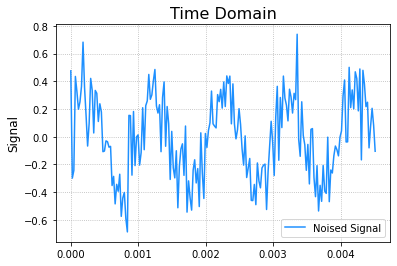

In [3]:
'''
Plot origin noised signal in time domain.
'''
sameple_rate,sigs = wf.read('audio/noised.wav')
sigs = sigs/(2**15)
times = np.arange(len(sigs))/sameple_rate
plt.figure()
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')
plt.plot(times[:200],sigs[:200],color='dodgerblue',label='Noised Signal')
plt.legend()
plt.show()

In [4]:
### Do fourier transform.
freqs = nf.fftfreq(sigs.size, 1/sameple_rate)
complex_arry = nf.fft(sigs)
pows = np.abs(complex_arry)

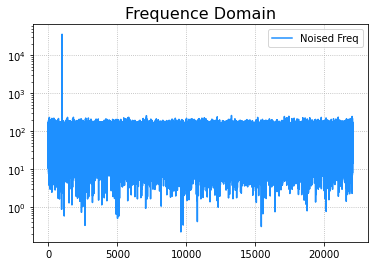

In [5]:
'''
Plot origin noised signal in frequency domain.
'''
plt.figure()
plt.title('Frequence Domain',fontsize=16)
plt.grid(linestyle=':')
plt.semilogy(freqs[freqs>0],pows[freqs>0],color='dodgerblue',label='Noised Freq')
plt.legend()
plt.show()

In [5]:
### Filter the noisy frequency.
the_freq = freqs[pows.argmax()] ### the frequency we want to keep
noised_idx = np.where(freqs != the_freq)[0]
ca = complex_arry[:]
ca[noised_idx] = 0 
filter_pows = np.abs(complex_arry)
filter_sigs = nf.ifft(ca).real # We only care about the real part.

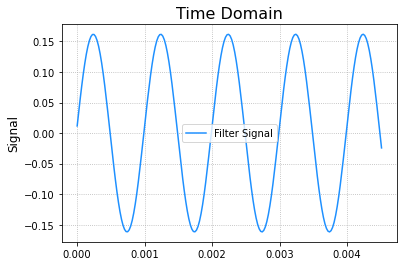

In [6]:
'''
Plot the signal after filtering in time domain.
'''
plt.figure()
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')
plt.plot(times[:200],filter_sigs[:200],color='dodgerblue',label='Filter Signal')
plt.legend()
plt.show()

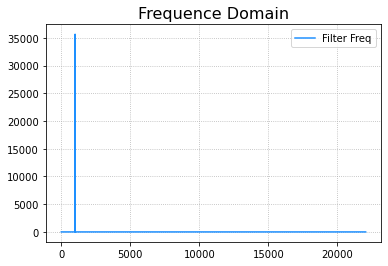

In [7]:
'''
Plot the signal after filtering in frequency domain.
'''
plt.figure()
plt.title('Frequence Domain',fontsize=16)
plt.grid(linestyle=':')
plt.plot(freqs[freqs>0],filter_pows[freqs>0],color='dodgerblue',label='Filter Freq')
plt.legend()
plt.show()

In [9]:
print("Now play the signal after filtering.")
ipd.Audio('audio/filter.wav')

Now play the signal after filtering.
